In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

<h1><center>Boosting</center></h1>

### Recap Lecture

## Linear ensembles

$$
F(x)=f_{0}(x)+\alpha_{1}h_{1}(x)+...+\alpha_{M}h_{M}(x)
$$

**Regression:** $\widehat{y}(x)=F(x)$

**Binary classification:** $score(y|x)=F(x),\,\widehat{y}(x)= sign(F(x))$
* Notation: $h_{1}(x),...h_{M}(x)$ are called *base learners, weak learners, base models*.
* Too expensive to optimize $f_{0}(x),h_{1}(x),...h_{M}(x)$ and $\alpha_{1},...\alpha_{M}$ jointly for large $M$.
* May lead to overfitting
* Idea: optimize $f_{0}(x)$ and then each pair $(h_{m}(x),\,\alpha_{m})$ greedily.

**Input**: 
* training dataset $(x_{i},y_{i}),\,i=1,2,...N$; 
* loss function $\mathcal{L}(f,y)$,
* general form of "base learner" $h(x|\gamma)$ (dependent from parameter $\gamma$) 
* number $M$ of successive additive approximations.

**ALGORITHM**:
1. Fit initial approximation $f_{0}(x)=\arg\min_{f}\sum_{i=1}^{N}\mathcal{L}(f(x_{i}),y_{i})$ 
2. For $m=1,2,...M$:

    1. find next best classifier
$$
(\alpha_{m},h_{m})=\arg\min_{h,c}\sum_{i=1}^{N}\mathcal{L}(f_{m-1}(x_{i})+\alpha h(x_{i}),\,y_{i})
$$
    2. set
$$
f_{m}(x)=f_{m-1}(x)+\alpha_{m}h_{m}(x)
$$
**Output**: approximation function $f_{M}(x)=f_{0}(x)+\sum_{m=1}^{M}\alpha_{m}h_{m}(x)$

# AdaBoost

## Adaboost (discrete version): assumptions

* binary classification task $y\in\{+1,-1\}$
* family of base classifiers $h(x)=h(x|\gamma)$ where $\gamma$ is some fixed parametrization.
* $h(x)\in\{+1,-1\}$
* classification is performed with $\widehat{y}=sign\{f_{0}(x)+\alpha_{1}f_{1}(x)+...+\alpha_{M}f_{M}(x)\}$
* optimized loss is $\mathcal{L}(y,f(x))=e^{-yf(x)}$

## Adaboost (discrete version): algorithm

**Input**: training dataset $(x_{i},y_{i}),\,i=1,2,...n$; number of additive weak classifiers $M$, a family of weak classifiers $h(x)\in\{+1,-1\}$, trainable on weighted datasets.

**ALGORITHM**:
1. Initialize observation weights $w_{i}=1/n$, $i=1,2,...n$.
2. for $m=1,2,...M$:

    1. fit $h^{m}(x)$ to training data using weights $w_{i}$
    2. compute weighted misclassification rate:
$$
E_{m}=\sum_{i=1}^{N}w_{i}\mathbb{I}[h^{m}(x_i)\ne y_{i}]
$$
    4. compute $\alpha_{m}=\frac{1}{2}\ln\left((1-E_{m})/E_{m}\right)$
    5. update sample weights:
$$
w_{i}\leftarrow \frac{w_{i}e^{-\alpha_{m}y_i h^{m}(x_i)}}{W},$$
Where $W$ is normalization factor $\left(W = \sum_i w_i e^{-\alpha_m y_i h^m(x_i)}\right)$


**Output**: composite classifier $f(x)=sign\left(\sum_{m=1}^{M}\alpha_{m}h^{m}(x)\right)$

### Formula for alpha

On m step our task to minimizae exponential loss. Let's write this

$$
L = \sum\limits_{i=1}^N e^{-y_i \cdot f(x_i)} =  \sum\limits_{i=1}^N e^{-y_i \cdot (h_0(x_i) + \alpha_1h_1(x_i) + \alpha_2h_2(x_i) + \ldots + \alpha_mh_m(x_i))} = \sum\limits_{i=1}^N w_i^m e^{-y_i \alpha_m h_m(x_i)}
$$

Where
$$
w_i^m = e^{-y_i \left(h_0(x_i) + \sum\limits_{k=1}^{m-1}\alpha_k h_k(x_i)\right)}
$$

Let's calc derivative

$$
\frac{\partial L}{\partial \alpha_m} = -\sum\limits_{i=1}^N w_i^m e^{-y_i\alpha_m h_m(x_i)} y_i h_m(x_i) = 0
$$

Rewrite, we use that $h_m(x_i) = \{-1; 1\}$

$$
\sum\limits_{i=1}^N w_i^m e^{-y_i\alpha_m h_m(x_i)} y_i h_m(x_i) = \sum\limits_{i=1 : h_m(x_i) = y_i}^N w_i^m e^{-\alpha_m} - \sum\limits_{i=1 : h_m(x_i) \ne y_i}^N w_i^m e^{\alpha_m} = 0 \rightarrow \sum\limits_{i=1 : h_m(x_i) = y_i}^N w_i^m e^{-\alpha_m} = \sum\limits_{i=1 : h_m(x_i) \ne y_i}^N w_i^m e^{\alpha_m}
$$

Mul on $e^{\alpha_m}$

$$
\sum\limits_{i=1 : h_m(x_i) = y_i}^N w_i^m = \sum\limits_{i=1 : h_m(x_i) \ne y_i}^N w_i^m e^{2\alpha_m} \rightarrow
\alpha_2 = \frac{1}{2}\ln \left[\frac{\sum_{i=1}^{N}w_{i}\mathbb{I}[h^{m}(x_i) = y_{i}]}{\sum_{i=1}^{N}w_{i}\mathbb{I}[h^{m}(x_i)\ne y_{i}]} \right] = \frac{1}{2}\ln\left[\frac{1-E_{m}}{E_{m}}\right]
$$ 

### Simple Implementation

How use trees with weights?

You know when you build tree you find best split by criteria

$$
\max\left[I(U)- \left(\frac{|U_l|}{|U|}I(U_l) + \frac{|U_r|}{|U|}I(U_r)\right)\right]
$$

for example $I(U)$ - entropy

In weight case (we assume $\sum\limits_{i=1}^nw_i = 1$)

$$
    |U| = \sum_{i=1 : x_i \in U}^N w_i, ~ and ~ I(U) = -p\log_2(p) - (1-p)\log_2(1-p), ~ where ~ p = \frac{\sum\limits_{i=1 : x_i \in U, y_i = 1}^n w_i}{|U|}
$$

Comment:
unweight case is equivalent when all weights = 1 / n

In [2]:
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm_notebook

In [3]:
class AdaBoostClassifier(object):
    def __init__(self, base_estimator, n_estimators = 100):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
    
    def fit(self, X, y):
        from sklearn.base import clone
        weights = np.ones(X.shape[0], dtype=float) / X.shape[0]
        self.estimators = []
        self.alphas = []
        for i in tqdm_notebook(range(self.n_estimators)):
            estimator = clone(self.base_estimator)
            estimator.fit(X, y, sample_weight = weights)
            
            error_index = y != estimator.predict(X)
            error = np.sum(weights[error_index])

            alpha = 0.5 * np.log((1 - error) / error)
            self.estimators.append(estimator)
            self.alphas.append(alpha)
            
            weights = self._update_weights(weights, estimator, alpha, X, y)
            
    def predict(self, X):
        res = np.zeros(X.shape[0])
        for estimator, alpha in zip(self.estimators, self.alphas):
            res += alpha * estimator.predict(X)
        return np.sign(res)
    
    def predict_proba(self, X):
        res = np.zeros(X.shape[0])
        for estimator, alpha in zip(self.estimators, self.alphas):
            res += alpha * estimator.predict_proba(X)
        return res
    
    def predict_top_n(self, X, n):
        res = np.zeros(X.shape[0])
        for estimator, alpha in zip(self.estimators[:n], self.alphas[:n]):
            res += alpha * estimator.predict_proba(X)
        return np.sign(res)
    
    def predict_proba_top_n(self, X, n):
        res = np.zeros(X.shape[0])
        for estimator, alpha in zip(self.estimators[:n], self.alphas[:n]):
            res += alpha * estimator.predict(X)
        return res
    
    
    def _update_weights(self, weights, estimator, alpha, X, y):
        weights *= np.exp(-estimator.predict(X) * y * alpha)
        return weights

### Load dataset

In [4]:
import pandas as pd
df_X = pd.read_csv('./data/x_train.csv', sep=';')
df_y = pd.read_csv('./data/y_train.csv', sep=';', header=None,
                  names=['target'])
df_X.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,21,2
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,51,4
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,14,1
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,1,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,12,1


In [5]:
df_y.head()

,target
0,0
1,1
2,1
3,1
4,0


In [6]:
X = df_X.values
y = df_y.values.reshape(-1)
print('Zero class count = {}'.format(y.shape[0] - np.sum(y)), 'One class count = {}'.format(np.sum(y)))
y[y== 0] -= 1

Zero class count = 18001 One class count = 7288


### Fit and predict

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=123, test_size=0.2)

In [9]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), 
                         n_estimators=300)

In [10]:
ada.fit(X_train, y_train)

In [11]:
from sklearn.metrics import roc_auc_score

In [12]:
train_auc = []
val_auc = []
for i in tqdm_notebook(range(1, 301, 1)):
    train_auc.append(roc_auc_score(y_train, ada.predict_proba_top_n(X_train, i)))
    val_auc.append(roc_auc_score(y_valid, ada.predict_proba_top_n(X_valid, i)))
    if i % 100 == 0:
        print("Accuracy with {} estimators:".format(i))
        print('\t Train  = {}'.format(train_auc[-1]))
        print('\t Val  = {}'.format(val_auc[-1]))

Accuracy with 100 estimators:
	 Train  = 0.8615384318701849
	 Val  = 0.8520388782900794
Accuracy with 200 estimators:
	 Train  = 0.8615384318701849
	 Val  = 0.8520388782900794
Accuracy with 300 estimators:
	 Train  = 0.8615384318701849
	 Val  = 0.8520388782900794



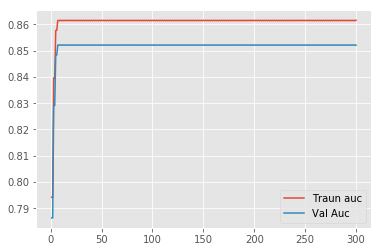

In [13]:
plt.plot(range(1, 301, 1), train_auc, label = 'Traun auc')
plt.plot(range(1, 301, 1), val_auc, label = 'Val Auc')
plt.legend(loc = 'best')

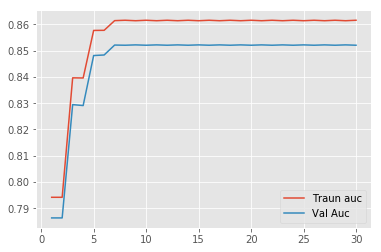

In [14]:
plt.plot(range(1, 31, 1), train_auc[:30], label = 'Traun auc')
plt.plot(range(1, 31, 1), val_auc[:30], label = 'Val Auc')
plt.legend(loc = 'best')

## Gradient boosting

## Gradient boosting

* Now consider $F\left(f(x_{1}),...f(x_{N})\right)=\sum_{n=1}^{N}\mathcal{L}\left(f(x_{n}),y_{n}\right)$
* Gradient descent performs pointwise optimization, but we need generalization, so we optimize in space of functions.
* Gradient boosting implements modified gradient descent in function space:
    * find $z_{i}=-\frac{\partial\mathcal{L}(r,y_{i})}{\partial r}|_{r=f^{m-1}(x_{i})}$
    * fit base learner $h_{m}(x)$ to $\left\{ (x_{i},z_{i})\right\} _{i=1}^{N}$

## Gradient boosting algorithm

**Input**: training dataset $(x_{i},y_{i}),\,i=1,2,...N$; loss function $\mathcal{L}(f,y)$; learning rate $\nu$ and the number $M$ of successive additive approximations.

1. Fit initial approximation $f_{0}(x)$ (might be taken $f_{0}(x)\equiv0$)
2. For each step $m=1,2,...M$:

    1. calculate derivatives $z_{i}=-\frac{\partial\mathcal{L}(r,y_{i})}{\partial r}|_{r=f^{m-1}(x_{i})}$
    2. fit $h_{m}$ to $\{(x_{i},z_{i})\}_{i=1}^{N}$, for example by solving
$$
\sum_{n=1}^{N}(h_{m}(x_{n})-z_{n})^{2}\to\min_{h_{m}}
$$
    4. set $f_{m}(x)=f_{m-1}(x)+\nu h_{m}(x)$


**Output**: approximation function $f_{M}(x)=f_{0}(x)+\sum_{m=1}^{M}\nu h_{m}(x)$

### Examples

##### Regression

Loss function is MSE ($ r_i = f(x_i)$)
$$
MSE(r_i, y_i) = L(r_i, y_i) =  (r_i - y_i)^2 \rightarrow \frac{\partial L}{\partial r} = 2(r_i - y_i)
$$

So on each iteration we solve regression task
$$
x_i \rightarrow -(r_{i} - y_i)
$$


#### Classification
Loss function is log_loss ($ r_i = f(x_i) = \langle w, x_i \rangle$)
$$
log\_loss(r_i, y_i) = L(r_i, y_i) = log(1 + exp(- r_i y_i)) \rightarrow \frac{\partial L}{\partial r} = \frac{-exp(- r_i y_i) \cdot y_i}{1 + exp(- r_i y_i) }
$$

So on each iteration we solve regression task
$$
x_i \rightarrow \frac{exp(- r_i y_i) \cdot y_i}{1 + exp(- r_i y_i) }
$$

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

/Users/r.britkov/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


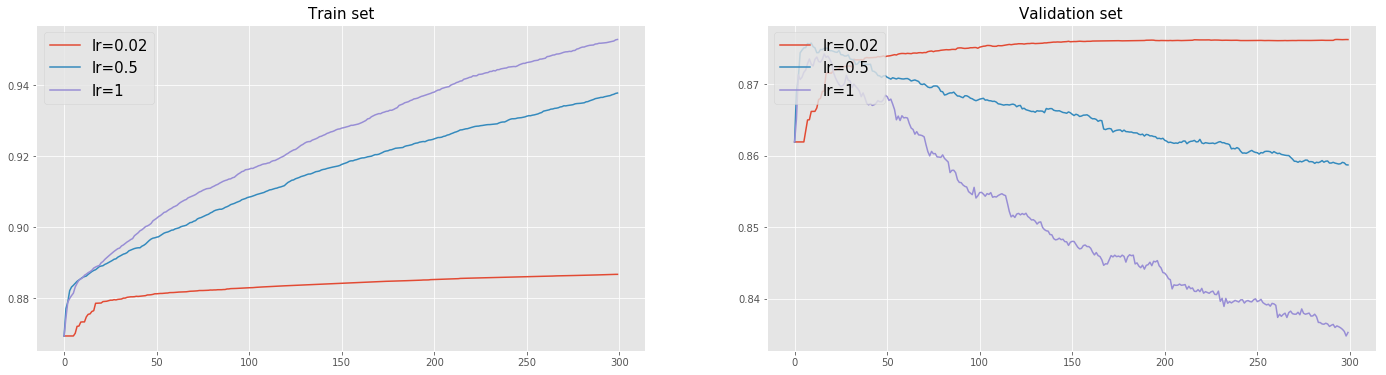

In [16]:
plt.rcParams['figure.figsize'] = (24, 6)

fig, ax = plt.subplots(1,2)
for lr in [0.02, 0.5, 1]:

    model = GradientBoostingClassifier(n_estimators=300, max_depth=3,
                                       learning_rate=lr, 
                                       random_state=123)
    model.fit(X_train, y_train)

    scores_train = []
    scores_valid = []

    for y_pred in model.staged_predict_proba(X_train):
        scores_train.append(roc_auc_score(y_train, y_pred[:, 1]))
        
    ax[0].plot(scores_train, label='lr={}'.format(lr))
    ax[0].set_title('Train set', size = 15)
    ax[0].legend(loc = 'upper left', prop={'size': 15})

    for y_pred in model.staged_predict_proba(X_valid):
        scores_valid.append(roc_auc_score(y_valid, y_pred[:, 1])) 
        
    ax[1].plot(scores_valid, label='lr={}'.format(lr))
    ax[1].set_title('Validation set', size = 15)
    ax[1].legend(loc = 'upper left', prop={'size': 15})